# Исследование объявлений о продаже квартир

#### Описание проекта

В распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.<br><br>
<b>Задача исследования</b> — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.<br><br>
О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка. 

<div>
<b>Описание данных</b><br>

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — общая площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

**1.1. Первые 20 строчек датафрейма**

In [2]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**1.2. Основная информация о датафрейме**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**1.3. Построение общей гистограммы для всех столбцов датафрейма**

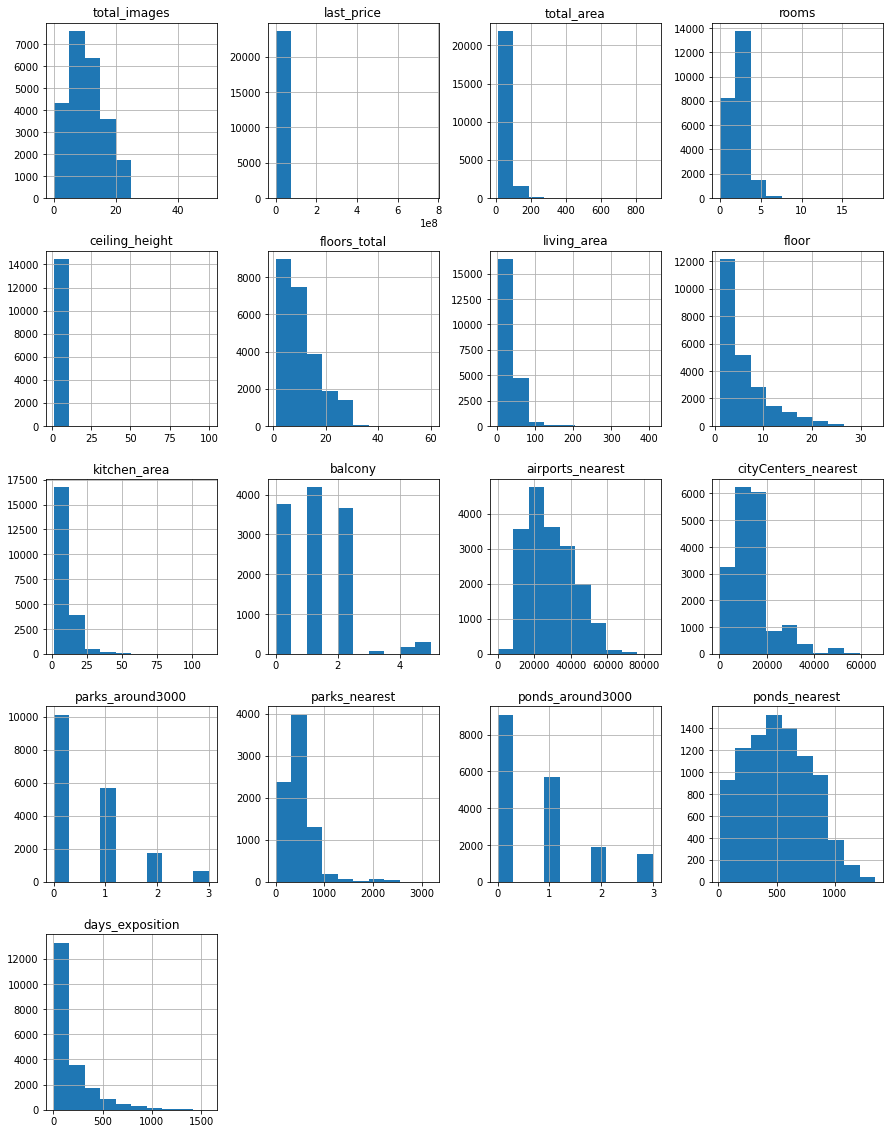

In [4]:
import matplotlib.pyplot as plt
data.hist(figsize=(15,20))
plt.show()

### Предобработка данных

**2.1. Исследование и заполнение пропусков в данных**

In [5]:
#data.isna().sum() #посчитаем количество пропусков в каждом столбце датафрейма
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


In [6]:
#в столбце "living_area" 8% пропусков, удалим выявленные пропуски
#data = data.dropna(subset=['living_area']) 
#проверим удалились ли пропуски в столбце "living_area"
#pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

**Вывод**

<p></p>

<div style="border:solid green 2px; padding: 20px">
В 14 столбцах выявлены пропущенные значения. Заменим пропуски в столбце количество балконов `balcony` на значение "0".


</div>

In [7]:
#заменяем все пропуски в столбце количество балконов на значение "0"
data['balcony'] = data['balcony'].fillna('0').astype('int')
#заменим пропуски в days_exposition и заменим тип данных
data['days_exposition'] = data['days_exposition'].fillna('0').astype('int')

**Вывод**

<p></p>

<div style="border:solid green 2px; padding: 20px">
Причины, которые могли привести к пропускам в исходных данных: человеческий фактор (например при внесении данных, могли случайно нажать пробел, скопировать лишние символы, удалить значения ячеек). 
<br>   
Также могут быть технические причины появления пропусков (например, неудачно написанный код, по которому происходила загрузка данных с сервера). 
<br>   
Также, например, пользователь не указал о себе какие-нибудь сведения или автоматизированная система сбора информации дала сбой. Иногда пропуски оставляют умышленно, рассчитывая на автозаполнение спецсимволами. 
<br> 
Также пользователи могут заполнить в анкетах не все данные. 

</div>

**2.2. Изменение типов данных.**

In [8]:
# Меняем тип данных в столбце `is_apartment` с object на bool
data['is_apartment'] = data['is_apartment'].astype('boolean')

In [9]:
# Меняем тип данных с object в столбце `first_day_exposition` на datetime64[ns] 
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'] , format='%Y-%m-%d')
display(data['first_day_exposition'])

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

In [10]:
#Меняем тип данных с float на int в столбце 'cityCenters_nearest'
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('Int64')
display(data['cityCenters_nearest'])

0        16028
1        18603
2        13933
3         6800
4         8098
         ...  
23694     4232
23695     <NA>
23696     <NA>
23697    10364
23698     <NA>
Name: cityCenters_nearest, Length: 23699, dtype: Int64

In [11]:
#Меняем тип данных с float на int в столбце 'last_price'
data['last_price'] = data['last_price'].astype('Int64')
display(data['last_price'])

0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23694     9700000
23695     3100000
23696     2500000
23697    11475000
23698     1350000
Name: last_price, Length: 23699, dtype: Int64

**Вывод**

<p></p>

<div style="border:solid green 2px; padding: 20px">
Изменять тип данных необходимо, так как при дальнейшем исследовании может возникнуть необходимость выполнения каких-либо арифметических действий с различными ячейками. А в Pytnon есть определенные правила, при несоблюдении которых возникнут ошибки и код не будет выполняться. Например, при int + flot = код выполнится, при int + str = код выдаст ошибку. Любая операция со значением float дает результат того же типа. 
<br>
Также следует отдельно проверять тип данных в столбцах с датой или временем. Нельзя будет выполнить исследовательские действия, если в столбце с форматом дата будет тип данных object, вместо datetime64[ns]. 

</div>

In [12]:
# for locality_name in data['locality_name'].unique():
#     median = data.loc[data['locality_name'] == locality_name,'cityCenters_nearest'].median()
#     data.loc[(data['cityCenters_nearest'].isna()) & (data['locality_name'] == locality_name), 'cityCenters_nearest'] = median
# data.loc[data['cityCenters_nearest'].isna(), 'cityCenters_nearest'] = data['cityCenters_nearest'].median()    

In [13]:
# for locality_name in data['locality_name'].unique():
#     median = data.loc[data['locality_name'] == locality_name,'ceiling_height'].median()
#     data.loc[(data['ceiling_height'].isna()) & (data['locality_name'] == locality_name), 'ceiling_height'] = median
# data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()    

**2.3. Обработка явных дубликатов.**

In [14]:
#посчитаем явные дубликаты 
data.duplicated().sum()

0

**2.4. Обработка неявных дубликатов.**

In [56]:
# считаем количество строк-дубликатов в данных locality_name - название населенного пункта
data['locality_name'].duplicated().sum()

23381

In [16]:
#выведем уникальные значения по столбцу название населенного пункта
data['locality_name'].unique() 

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [17]:
# меняем часть строки с поселками
data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')
# меняем все населенные пункты с дубликатами
data['locality_name'] = data['locality_name'].replace({'Никольское': 'село Никольское', 'городской посёлок Советский': 'посёлок городского типа Советский', 'городской посёлок Большая Ижора': 'посёлок городского типа Большая Ижора', 'городской посёлок Лесогорский': 'посёлок городского типа Лесогорский', 'посёлок Рябово': 'посёлок городского типа Рябово', 'городской посёлок Мга': 'посёлок городского типа Мга', 'городской посёлок Павлово': 'посёлок городского типа Павлово', 'городской посёлок Назия': 'посёлок городского типа Назия', 'коттеджный посёлок Лесное': 'посёлок Лесное', 'Мурино': 'посёлок Мурино', 'Любань': 'посёлок Любань', 'городской посёлок Рощино': 'посёлок городского типа Рощино', 'деревня Кудрово': 'Кудрово'})
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'Кудрово', 'Коммунар', 'Колпино',
       'посёлок городского типа Красный Бор', 'Гатчина',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'посёлок Молодцово',
       'посёлок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'посёлок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'посёлок Торковичи', 'посёлок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый Свет', 'Слан

**2.5. Обработка и удаление аномалий(редких значений)**

(0.0, 35.0)

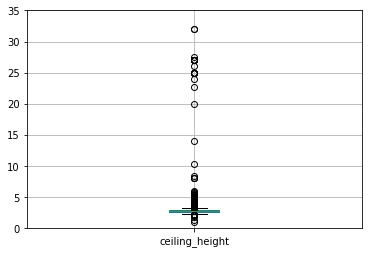

In [18]:
data.boxplot('ceiling_height')
plt.ylim(0, 35)

In [19]:
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: x/10  if x>10 else x)
print(data['ceiling_height'].min())
print(data['ceiling_height'].max())

1.0
10.0


**Вывод**

<p></p>

<div style="border:solid green 2px; padding: 20px">
В столбце 'ceiling_height' - высота потолков, были обнаружены аномальные данные (25 м или 35 м). Аномалии были обработаны и переведены из целочисленных значений в вещественные. Минимальная высота потолка составила 1 м, максимальная высота 10 м. 

</div>

(0.0, 100.0)

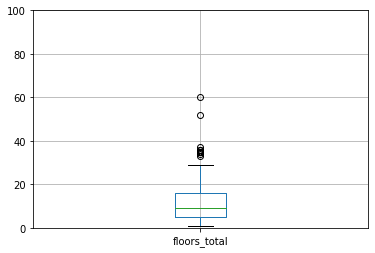

In [20]:
data.boxplot('floors_total')
plt.ylim(0, 100)

In [21]:
# удаляем строки с количеством этажей более 30
data.query('floors_total < 30 or floors_total.isna()', engine = 'python')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,<NA>,...,25.00,0,Санкт-Петербург,18863.0,16028,1.0,482.0,2.0,755.0,0
1,7,3350000,40.40,2018-12-04,1,NaN,11.0,18.6,1,<NA>,...,11.00,2,посёлок Шушары,12817.0,18603,0.0,NaN,0.0,NaN,81
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.3,4,<NA>,...,8.30,0,Санкт-Петербург,21741.0,13933,1.0,90.0,2.0,574.0,558
3,0,64900000,159.00,2015-07-24,3,NaN,14.0,NaN,9,<NA>,...,NaN,0,Санкт-Петербург,28098.0,6800,2.0,84.0,3.0,234.0,424
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.0,13,<NA>,...,41.00,0,Санкт-Петербург,31856.0,8098,2.0,112.0,1.0,48.0,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,<NA>,...,13.83,0,Санкт-Петербург,24665.0,4232,1.0,796.0,3.0,381.0,0
23695,14,3100000,59.00,2018-01-15,3,NaN,5.0,38.0,4,<NA>,...,8.50,0,Тосно,NaN,<NA>,NaN,NaN,NaN,NaN,45
23696,18,2500000,56.70,2018-02-11,2,NaN,3.0,29.7,1,<NA>,...,NaN,0,село Рождествено,NaN,<NA>,NaN,NaN,NaN,NaN,0
23697,13,11475000,76.75,2017-03-28,2,3.00,17.0,NaN,12,<NA>,...,23.30,2,Санкт-Петербург,39140.0,10364,2.0,173.0,3.0,196.0,602


**Вывод**

<p></p>

<div style="border:solid green 2px; padding: 20px">
При предобработке данных были выявлены пропуски в процентном соотношении. Пропуски в столбце "balcony"  - число балконов были заполнены значением 0. Также была произведена проверка на аномальные значения, которая показала, что в столбце "ceiling_height" имеются аномальные значения с высотой потолков 25 и 35 м (были исправлены). Проверка на явные дубликаты показала, что их нет. Но были выявлены неявные дубликаты в столбце "locality_name". Дубликаты в столбце "locality_name" также устранены. В данном разделе в необходимых столбцах были изменены типы данных с float на int.
</div>

### Посчитайте и добавьте в таблицу новые столбцы

**3.1. Расчет цены одного квадратного метра**

In [22]:
# рассчитаем цену одного квадратного метра. Затем переводим полученные данные из типа float в int.
data['price_per_square_metr'] = (data['last_price'] / data['total_area']).astype('int')

**3.2. День недели публикации объявления**

In [23]:
# выведем день недели публикации объявления
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

**3.3. Месяц и год публикации объявления**

In [24]:
# добавляю столбец с месяцем публикации объявления
data['month_exposition']=pd.DatetimeIndex(data['first_day_exposition']).month
# добавляю столбец с годом публикации объявления
data['year_exposition']=pd.DatetimeIndex(data['first_day_exposition']).year 
# добавляю столбец с днем публикации объявления
data['day_exposition']=pd.DatetimeIndex(data['first_day_exposition']).day
#data['month_exposition'] = data['month_exposition'].astype('datetime64[M]')

**3.4. Тип этажа квартиры**

In [25]:
def category_floor(row): # используя функцию добавим новый столбец с типами этажей согласно условию по столбцу 'floor'
    
    floors_total = row['floors_total']
    floor = row['floor']
    
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    return 'другой'
data['category_floor'] = data.apply(category_floor, axis=1) #добавляем столбец тип этажа квартиры

**3.5. Расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)**

In [26]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest']/1000).astype('Int64')

**3.6. Проверим все добавленные столбцы из пунктов 3.1-3.5**

In [27]:
display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_metr,weekday_exposition,month_exposition,year_exposition,day_exposition,category_floor,cityCenters_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,<NA>,...,2.0,755.0,0,120370,3,3,2019,7,другой,16
1,7,3350000,40.40,2018-12-04,1,NaN,11.0,18.6,1,<NA>,...,0.0,NaN,81,82920,1,12,2018,4,первый,18
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.3,4,<NA>,...,2.0,574.0,558,92785,3,8,2015,20,другой,13
3,0,64900000,159.00,2015-07-24,3,NaN,14.0,NaN,9,<NA>,...,3.0,234.0,424,408176,4,7,2015,24,другой,6
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.0,13,<NA>,...,1.0,48.0,121,100000,1,6,2018,19,другой,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,<NA>,...,3.0,381.0,0,72490,1,3,2017,21,другой,4
23695,14,3100000,59.00,2018-01-15,3,NaN,5.0,38.0,4,<NA>,...,NaN,NaN,45,52542,0,1,2018,15,другой,<NA>
23696,18,2500000,56.70,2018-02-11,2,NaN,3.0,29.7,1,<NA>,...,NaN,NaN,0,44091,6,2,2018,11,первый,<NA>
23697,13,11475000,76.75,2017-03-28,2,3.00,17.0,NaN,12,<NA>,...,3.0,196.0,602,149511,1,3,2017,28,другой,10


### Проведите исследовательский анализ данных

**4.1.1 Изучим общую площадь**

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

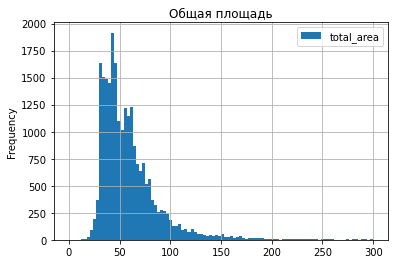

In [28]:
#построим гистограмму по общей площади квартир
data.plot(title = 'Общая площадь', y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (6,4), range = (0,300))
data['total_area'].describe()

**Вывод**

<p></p>

<div style="border:solid green 2px; padding: 20px">
По построенной гистограмме можно заметить, что распределение общей площади нормальное. Общая площадь у большинства квартир находится в диапазоне 40-60 квадратных метров. Общая выборка по площади имеет большой размах, от 12 до 900 квадратных метров. Медианное значение не значительно отличается от среднего, медиана составила 52 кв метра, среднее 60,3 кв метра. 

</div>

**4.1.2. Изучим жилую площадь**

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

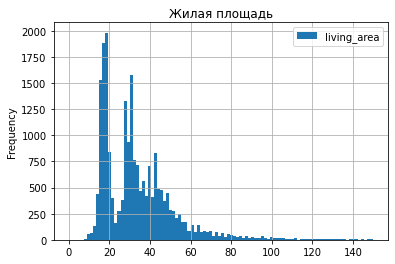

In [29]:
data.plot(title = 'Жилая площадь', y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (6,4), range = (0,150)) 
data['living_area'].describe()

**Вывод**

<p></p>

<div style="border:solid green 2px; padding: 20px">
По построенной гистограмме можно заметить, что распределение жилой площади имеет выбросы. С жилой площадью от 60 квадратных метров квартир незначительное количество. В данных имеются отклонения, так как минимальная жилая площадь не может составлять 2 квадратных метра. Средняя жилая площадь составила 30 квадратных метров, что статистически похоже на правду. 

</div>

**4.1.3. Изучим площадь кухни**

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

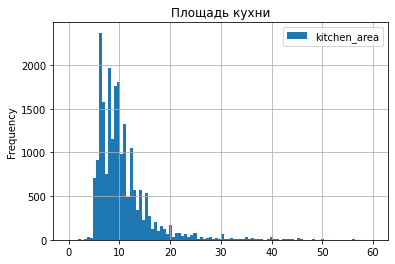

In [30]:
data.plot(title = 'Площадь кухни', y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (6,4), range = (0,60)) 
data['kitchen_area'].describe()

**Вывод**

<p></p>

<div style="border:solid green 2px; padding: 20px">
Площадь кухни находится в диапазоне от 1,3 квадратных метра до 112 квадратных метров. В данных имеются выбросы, минимальное значение площади не является реалистичным. Медианное значение составляет кухня с площадью 9,1 квадратный метр. Кухни с площадью от 30 квадратных метров не репрезентативны для анализа, т.к. доля таких квартир, очень маленькая среди предоставленных данных. 

</div>

**4.1.4. Цена объекта**

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

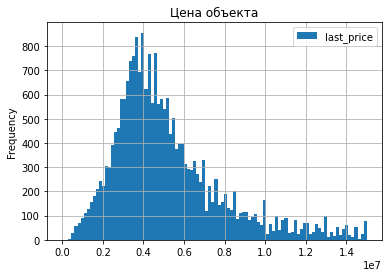

In [31]:
data.plot(title = 'Цена объекта', y = 'last_price', kind = 'hist', bins = 100, grid=True, figsize = (6,4), range = (0,15000000)) 
data['last_price'].describe()

**Вывод**

<p></p>

<div style="border:solid green 2px; padding: 20px">
Цены на недвижимость находятся в диапазоне от 1,2 млн до 7,6 млн руб. Средняя стоимость квартиры составила 6,5 млн руб., медианное значение 4,6 млн.руб.

</div>

**4.1.5. Количество комнат**

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

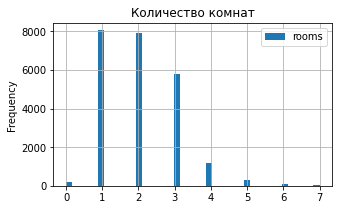

In [32]:
data.plot(title = 'Количество комнат', y = 'rooms', kind = 'hist', bins = 40, grid=True, figsize = (5,3), range = (0,7)) 
data['rooms'].describe()

**Вывод**

<p></p>

<div style="border:solid green 2px; padding: 20px">
По диаграмее можно увидеть, что имеются выбросы, например минимальное значение комнат равно 0. Общее количество комнат находится в диапазоне от 1 до 19. Больше всего однокомнатных квартир, что является реалистичным. Недвижимость с количеством комнат от 6 и более, не является репрезентативной для анализа. 
</div

**4.1.6. Высота потолков**

count    14504.000000
mean         2.728100
std          0.299855
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         10.000000
Name: ceiling_height, dtype: float64

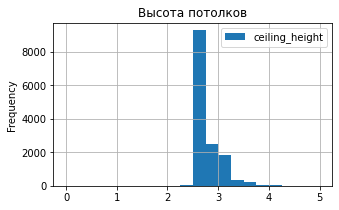

In [33]:
data.plot(title = 'Высота потолков', y = 'ceiling_height', kind = 'hist', bins = 20, grid=True, figsize = (5,3), range = (0,5)) 
data['ceiling_height'].describe()

**Вывод**

<p></p>

<div style="border:solid green 2px; padding: 20px">
Высота потолков в среднем составляет 2,73 м, медиана 2,65 м. Также имеются нереалистичные данные, высота потолков по исходным данным в квартирах не может составлять 1 м.
</div


**4.1.7. Этаж квартиры**

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

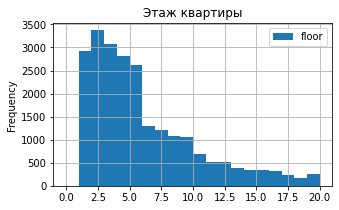

In [34]:
data.plot(title = 'Этаж квартиры', y = 'floor', kind = 'hist', bins = 20, grid=True, figsize = (5,3), range = (0,20)) 
data['floor'].describe()

**Вывод**

<p></p>

<div style="border:solid green 2px; padding: 20px">
Максимальное количество квартир находится примерно до 6 этажа включительно. Разброс по этажам с 1-33. 
</div

**4.1.8. Тип этажа квартиры («первый», «последний», «другой»)**

<AxesSubplot:>

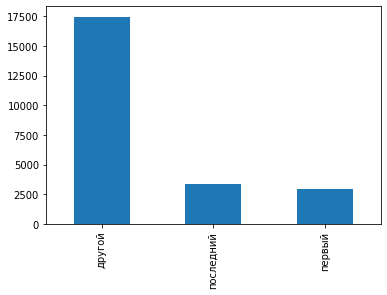

In [35]:
data['category_floor'].value_counts().plot.bar()

**Вывод**

<p></p>

<div style="border:solid green 2px; padding: 20px">
Максимальное количество квартир с типом не первый этаж и не последний, а "другой". Количество квартир на первых этажах и на последних отличается незначительно. 
</div

**4.1.9. Общее количество этажей в доме**

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

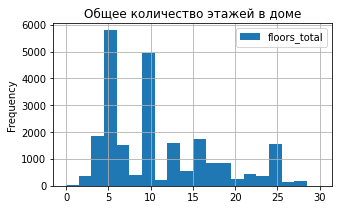

In [36]:
data.plot(title = 'Общее количество этажей в доме', y = 'floors_total', kind = 'hist', bins = 20, grid=True, figsize = (5,3), range = (0,30)) 
data['floors_total'].describe()

**Вывод**

<p></p>

<div style="border:solid green 2px; padding: 20px">
Общее количество этажей в доме в диапазоне от 1 до 60. Максимальное количество квартир в пятиэтажных домах. Квартир в домах с этажностью от 25 и более несущественное количество.
</div

**4.1.10. Расстояние до центра города в метрах**

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

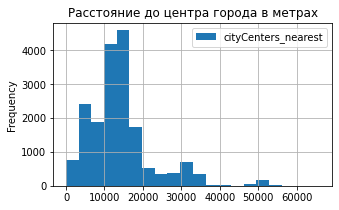

In [37]:
data.plot(title = 'Расстояние до центра города в метрах', y = 'cityCenters_nearest', kind = 'hist', bins = 20, grid=True, figsize = (5,3), range = (0,66000)) 
data['cityCenters_nearest'].describe()

**Вывод**

<p></p>

<div style="border:solid green 2px; padding: 20px">
Среднее расстояние до центра города составляет 13098,5 м. Наибольшее количество объявлений о продаже квартир находится по расстоянию до центра города в диапазоне от 10 000 до 14 000 м. 
</div

**4.1.11. Расстояние до ближайшего аэропорта**

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

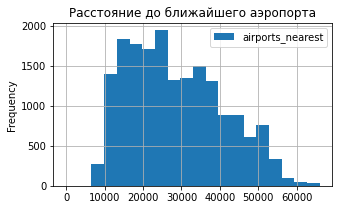

In [38]:
data.plot(title = 'Расстояние до ближайшего аэропорта', y = 'airports_nearest', kind = 'hist', bins = 20, grid=True, figsize = (5,3), range = (0,66000)) 
data['airports_nearest'].describe()

**Вывод**

<p></p>

<div style="border:solid green 2px; padding: 20px">
Среднее расстояние до ближайшего аэропорта составляет 28793.6 м. Наибольшее количество объявлений о продаже квартир находится по расстоянию до ближайшего аэропорта в диапазоне от 24 000 до 26 000 м. 
</div

**4.1.12. Расстояние до ближайшего парка**

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

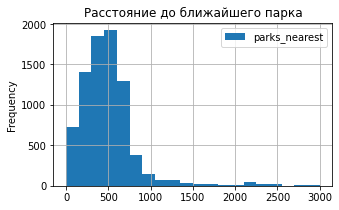

In [39]:
data.plot(title = 'Расстояние до ближайшего парка', y = 'parks_nearest', kind = 'hist', bins = 20, grid=True, figsize = (5,3), range = (0,3000)) 
data['parks_nearest'].describe()

**Вывод**

<p></p>

<div style="border:solid green 2px; padding: 20px">
Среднее расстояние до ближайшего парка составляет 490,8 метров. При удаленности квартир от 700 метров и больше, выявлено незначительное количество размещенных объявлений.
</div

**4.1.13. День и месяц публикации объявления**

count    23699.000000
mean         6.400101
std          3.491561
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64

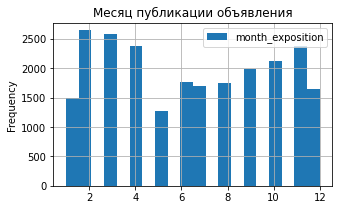

In [40]:
data.plot(title = 'Месяц публикации объявления', y = 'month_exposition', kind = 'hist', bins = 20, grid=True, figsize = (5,3), range = (1,12)) 
data['month_exposition'].describe()

count    23699.000000
mean        15.481582
std          8.642389
min          1.000000
25%          8.000000
50%         15.000000
75%         23.000000
max         31.000000
Name: day_exposition, dtype: float64

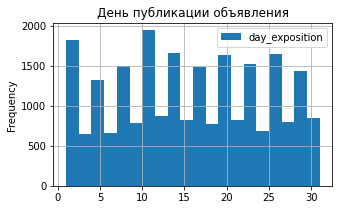

In [41]:
data.plot(title = 'День публикации объявления', y = 'day_exposition', kind = 'hist', bins = 20, grid=True, figsize = (5,3), range = (1,31)) 
data['day_exposition'].describe()

**Вывод**

<p></p>

<div style="border:solid green 2px; padding: 20px">
По построенным гистограммам можно сделать следующий вывод: наибольшее количество объявлений в среднем было размещено в феврале-марте-апреле. В летний период наблюдается спад, скорее всего связанный с большим количеством отпусков и отсутствием части людей в городах. Затем в осенне - зимний период (до ноября включительно) наблюдается рост публикаций объявлений о продаже квартир. В предновогодний период (декабрь) наблюдается спад по публикациям объявлений.
</div>

**4.2. Исследование количества дней для продажи квартиры**

count    23699.000000
mean       156.608844
std        213.546873
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

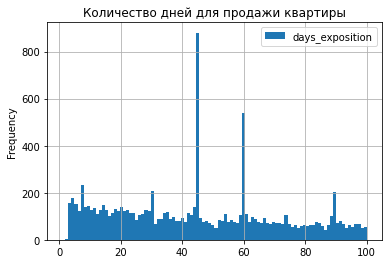

In [42]:
data.plot(title = 'Количество дней для продажи квартиры', y = 'days_exposition', kind = 'hist', bins = 100, grid=True, range = (1,100)) 
data['days_exposition'].describe()

**Вывод**

<p></p>

<div style="border:solid green 2px; padding: 20px">
Построив гистограмму со значениями до 200 и с количеством корзин 200, выявились аномалии. Согласно графику, выбивающиеся значения примерно на 7, 32, 48, 60 и 90 днях. Именно эти дни являются самыми популярными в количестве дней до снятия объявления.
<br> Также некоторые квартиры продаются за 0 дней, что является аномалией в большинстве случаев. Предполагаю, что такое возможно, если пользователь опубликовал объявление и сразу же в этот день его снял с публикации. Исключим данные о продаже за 0 дней и построим гистрограмму повторно.
<br>

</div>

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

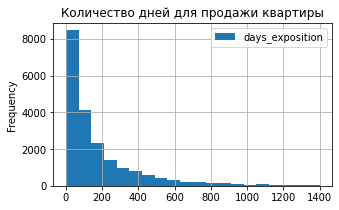

In [43]:
data.plot(title = 'Количество дней для продажи квартиры', y = 'days_exposition', kind = 'hist', bins = 20, grid=True, figsize = (5,3), range = (1,1400)) 
data[data['days_exposition']!=0]['days_exposition'].describe()

(1.0, 1300.0)

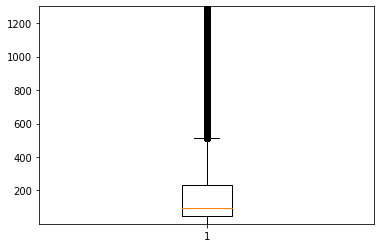

In [44]:
import matplotlib.pyplot as plt
plt.boxplot(data[data['days_exposition']!=0]['days_exposition'])
plt.ylim(1, 1300)

**Вывод**

<p></p>

<div style="border:solid green 2px; padding: 20px">
Среднее значение продажи квартиры 180 дней. Медианное значение - 95 дней. Эти данные стали более приближенными к реальности после очистки аномалии в 0 дней. Быстрыми продажи можно считать до 25% квартиль (то есть до 45 дней). Самыми долгими можно считать продажи от 75% квартиль (то есть от 232 дней до 1580 дней). Получено распределение Пуассона.
</div>

**4.3. Исследование факторов, влияющих на полную стоимость квартиры**

**4.3.1. Исследование зависимости общей площади от цены**

Корреляция: 0.6536750579657242


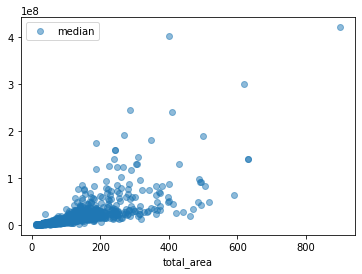

In [45]:
#строим сводную таблицу с применением агрегирующих функций
data['last_price'] = data['last_price'].astype('float')
pivot_table_total_area = data.pivot_table(index='total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
# убираем задвоенные названия столбцов
pivot_table_total_area.columns=['mean', 'count', 'median'] 
pivot_table_total_area.plot(y='median', style = 'o', alpha =0.5)
print('Корреляция:',data['total_area'].corr(data['last_price']))

**Вывод**

<p></p>

<div style="border:solid green 2px; padding: 20px">
Зависимость полной (общей стоимости) квартиры от общей площади имеется. Коэффициент корреляции Пирсона = 0,65. Так как с ростом первой величины растет и вторая, то корреляция положительная. Чем ближе коэффициент корреляции к 1, тем теснее линейная взаимосвязь.
</div>


**4.3.2. Исследование зависимости жилой площади от цены**

Корреляция: 0.5664915336952651


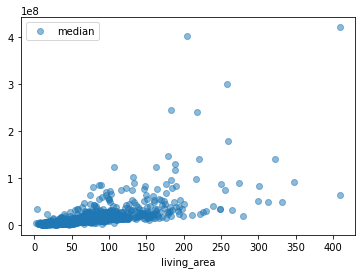

In [46]:
#строим сводную таблицу с применением агрегирующих функций
pivot_living_area = data.pivot_table(index='living_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
# убираем задвоенные названия столбцов
pivot_living_area.columns=['mean', 'count', 'median']
pivot_living_area.plot(y='median', style = 'o', alpha =0.5)
print('Корреляция:',data['living_area'].corr(data['last_price']))

**Вывод**

<p></p>

<div style="border:solid green 2px; padding: 20px">
Зависимость полной (общей стоимости) квартиры от жилой площади имеется. Коэффициент корреляции Пирсона = 0,57. Так как с ростом первой величины растет и вторая, то корреляция положительная. Чем ближе коэффициент корреляции к 1, тем теснее линейная взаимосвязь.
</div>

**4.3.3. Исследование зависимости площади кухни от цены**

Корреляция: 0.5198690130216392


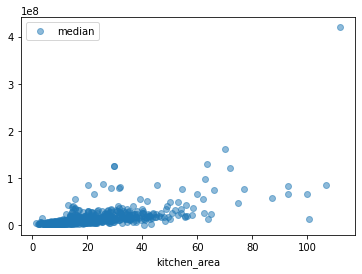

In [47]:
#строим сводную таблицу с применением агрегирующих функций
pivot_kitchen_area = data.pivot_table(index='kitchen_area', values = 'last_price', aggfunc = ['mean', 'count', 'median']) 
# убираем задвоенные названия столбцов
pivot_kitchen_area.columns=['mean', 'count', 'median']
pivot_kitchen_area.plot(y='median', style = 'o', alpha =0.5)
print('Корреляция:',data['kitchen_area'].corr(data['last_price']))

**Вывод**

<p></p>

<div style="border:solid green 2px; padding: 20px">
Зависимость общей площади квартиры от цены самая сильная (коэффициент корреляции 0,65), зависимость площади кухни от цены слабее (коэффициент корреляции 0,52).
</div>

**4.3.4. Исследование зависимости количества комнат от цены**

,mean,count,median
rooms,,,
0,3.337724e+06,197,2700000.0
1,3.835362e+06,8047,3600000.0
2,5.591605e+06,7940,4770169.0
3,8.179119e+06,5814,6200000.0
4,1.342350e+07,1180,9000000.0
5,2.376208e+07,326,14000000.0
6,3.170975e+07,105,19000000.0
7,5.147007e+07,59,24900000.0
8,5.022417e+07,12,23095000.0


0.3633428499648948

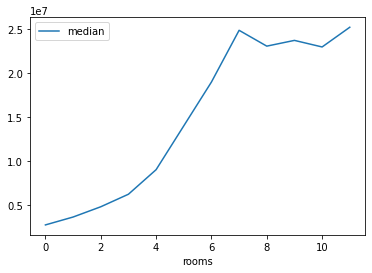

In [48]:
# Делаем сводную таблицу с зависимостью стоимость/количество комнат
pivot_rooms = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
# Переименовываем столбцы в сводной таблице
pivot_rooms.columns = ['mean', 'count', 'median'] 
# Изучаем данные, есть аномалия с 12-и комнатной квартирой
display(pivot_rooms)
#Строим график с исключением аномалии
pivot_rooms.query('rooms < 12').plot(y = 'median')
# Считаем коэффициент корреляции Пирсона
data['rooms'].corr(data['last_price'])

**Вывод**

<p></p>

<div style="border:solid green 2px; padding: 20px">
Зависимость количества комнат от цены высокая. Цены на квартиры от 1-7 комнат растут, а дальше от 7 комнат и выше рост в цене не наблюдается. Коэффициент корреляции Пирсона равен 0,36, так как не были исключены аномальные значения при расчете. График строили с условием меньше 12 комнат, так как в процессе построения сводной таблицы была выялена аномалия в данных по стоимости квартиры. 
</div>

**4.3.5. Исследование зависимости этажа, на котором расположена квартира от цены**

,mean,median
category_floor,,
другой,6.675444e+06,4850000.0
первый,4.803560e+06,3900000.0
последний,7.361025e+06,4300000.0


<AxesSubplot:xlabel='category_floor'>

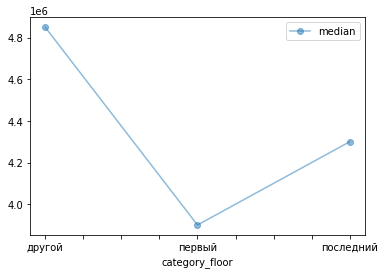

In [49]:
pivot_category_floor = data.pivot_table(index = 'category_floor', values = 'last_price', aggfunc = ['mean', 'median'])
pivot_category_floor.columns = ['mean', 'median']
display(pivot_category_floor)
pivot_category_floor.plot(y='median', style = 'o-', alpha =0.5)

**Вывод**

<p></p>

<div style="border:solid green 2px; padding: 20px">
В завивисимости от этажа, на котором расположена квартира, цена на неё меняется. Так, на первом этаже в среднем стоимость квартиры самая низкая, составляет 3,9. На последнем этаже квартиры стоят дороже - 4,3. На "другом" этаже стоимость 4,85. По сводной таблице можно сделать вывод, что зависимость имеется.
</div>

**4.3.6. Исследование зависимости даты размещения объявления (день недели) от цены**

,mean,count,median
weekday_exposition,,,
1,6.394233e+06,4183,4730000.0
2,6.627970e+06,3974,4700000.0
0,6.511613e+06,3612,4650000.0
3,6.708663e+06,4295,4650000.0
4,6.372131e+06,4000,4585000.0
5,6.976804e+06,1936,4555000.0
6,6.246180e+06,1699,4550000.0


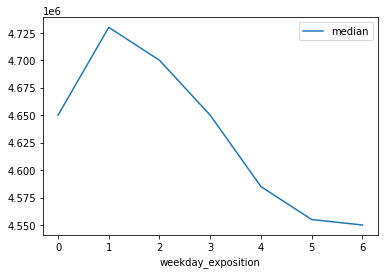

In [50]:
pivot_weekday_exposition = data.pivot_table(index = 'weekday_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_weekday_exposition.plot(y = 'median')

pivot_weekday_exposition.sort_values('median', ascending = False)

**Вывод**

<p></p>

<div style="border:solid green 2px; padding: 20px">
Согласно построенному графику и сводной таблице можно сделать следующие выводы:
<br>1. Cамая низкая стоимость на квартиры зафиксирована в воскресенье.
<br>2. Cамая высокая стоимость на квартиры зафиксирована во вторник. 
<br>То есть заметна тенденция, в начале недели квартиры стоят, как правило, дороже, к выходным снижение стоимости наблюдается. 
</div>

**4.3.7. Исследование зависимости даты размещения объявления (месяц) от цены**

,mean,count,median
month_exposition,,,
4,6.737198e+06,2379,4800000.0
9,6.825470e+06,1981,4700000.0
11,6.461363e+06,2371,4700000.0
12,7.011731e+06,1641,4700000.0
2,6.468500e+06,2640,4650000.0
3,6.359275e+06,2587,4650000.0
7,6.649337e+06,1695,4650000.0
1,6.668233e+06,1500,4600000.0
8,6.350233e+06,1744,4570000.0


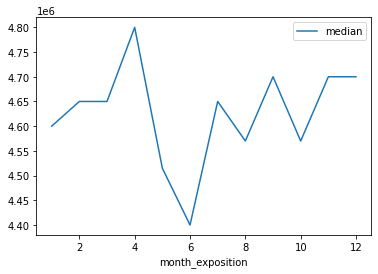

In [51]:
pivot_month_exposition = data.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_month_exposition.columns = ['mean', 'count', 'median']
pivot_month_exposition.plot(y = 'median')

pivot_month_exposition.sort_values('median', ascending = False)

**Вывод**

<p></p>

<div style="border:solid green 2px; padding: 20px">
Согласно построенному графику и сводной таблице можно сделать следующие выводы:
<br>1. Cамая низкая стоимость на квартиры зафиксирована в мае и июне.
<br>2. Cамая высокая стоимость на квартиры зафиксирована в апреле и сентябре. 
<br>Как правило, на практике, стоимость квартир ближе к осени всегда увеличивается, как и количество объявлений на рынке недвижимости. 
</div>

**4.3.8. Исследование зависимости даты размещения объявления (год) от цены**

,mean,count,median
year_exposition,,,
2014,1.208714e+07,137,7700000.0
2015,8.572833e+06,1191,5350000.0
2019,6.782388e+06,2879,5050000.0
2016,6.827912e+06,2783,4550000.0
2018,5.950966e+06,8519,4550000.0
2017,6.585729e+06,8190,4500000.0


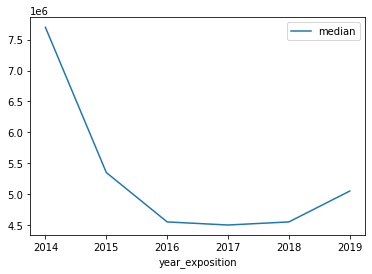

In [52]:
pivot_year_exposition = data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_year_exposition.columns = ['mean', 'count', 'median']
pivot_year_exposition.plot(y = 'median')

pivot_year_exposition.sort_values('median', ascending = False)

,mean,count,median
year_exposition,,,
2014,86.249854,137,76.26
2015,71.558371,1191,60.00
2016,62.156144,2783,53.10
2017,60.759249,8190,52.00
2019,59.467864,2879,52.00
2018,57.677386,8519,50.50


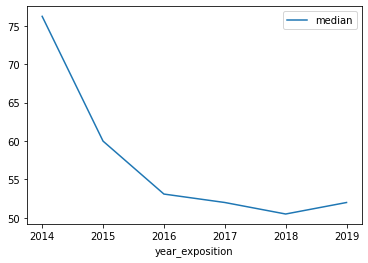

In [53]:
#рассмотрим динамику цены и площади продаваемых квартир также по годам
pivot_year_exposition = data.pivot_table(index = 'year_exposition', values = 'total_area', aggfunc = ['mean', 'count', 'median'])
pivot_year_exposition.columns = ['mean', 'count', 'median']
pivot_year_exposition.plot(y = 'median')

pivot_year_exposition.sort_values('median', ascending = False)

**Вывод**

<p></p>

<div style="border:solid green 2px; padding: 20px">
Согласно построенному графику и сводной таблице можно сделать следующие выводы:
<br>1. Cамая низкая стоимость на квартиры зафиксирована в 2017 году, так как стали покупать квартиры с маленькой площадью (52 кв.м), по сравнению с периодом в 2014 году (средняя площадь продаваемых квартир составляла 76,2 кв. м.) 
<br>2. Cамая высокая стоимость на квартиры зафиксирована в среднем в 2014 году (7,7), также как и площадь продаваемых квартиры самая большая зафиксирована в 2014 году (76,2 кв. м.)

</div>

**4.4. Анализ десяти населенных пунктов с наибольшим числом объявлений, анализ стоимости квадратного метра**

In [54]:
# Делаем сводную таблицу с зависимостью название населенного пункта /цена одного квадратного метра
pivot_locality_name = data.pivot_table(index='locality_name', values='price_per_square_metr' , aggfunc=['count', 'median'])
# Переименовываем столбцы и избавляемся от двойных названий столбцов
pivot_locality_name.columns = ['count', 'median']
# Сортируем сводную таблицу по количеству объявлений
pivot_locality_name = pivot_locality_name.sort_values('count', ascending = False).head(10)
display(pivot_locality_name)

,count,median
locality_name,,
Санкт-Петербург,15721,104761.0
посёлок Мурино,590,86175.0
Кудрово,472,95675.0
посёлок Шушары,440,76876.0
Всеволожск,398,65789.0
Пушкин,369,100000.0
Колпино,338,74723.5
посёлок Парголово,327,91642.0
Гатчина,307,67796.0


**Вывод**

<p></p>

<div style="border:solid green 2px; padding: 20px">
Согласно построенной сводной таблице можно сделать следующие выводы:
<br>1. Cамая низкая стоимость квадратного метра из 10 населенных пунктов с самым большим количеством объявлений зафиксирована в городе Выборг.
<br>2. Cамая высокая стоимость квадратного метра из 10 населённых пунктов с самым большим количеством объявлений зафиксирована в городе Санкт-Петербург. 
<br> 
</div>

**4.5. Анализ изменения цены квадратного метра в Санкт-Петербурге для каждого километра по степени удаленности от центра**

,price_per_square_metr
cityCenters_nearest_km,
0,138536.5
1,123966.0
2,116363.0
3,110079.5
4,126086.0
5,126041.0
6,134117.0
7,125000.0
8,114137.0


<AxesSubplot:title={'center':'Изменение цены объекта по удаленности от центра в км'}, xlabel='cityCenters_nearest_km'>

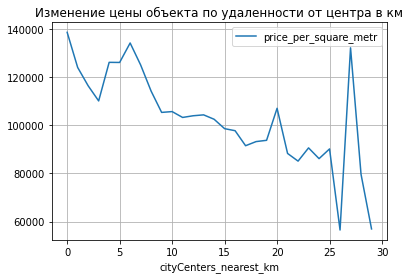

In [55]:
km_pivot = data.query('locality_name == "Санкт-Петербург"').pivot_table(index = 'cityCenters_nearest_km', values = 'price_per_square_metr', aggfunc = 'median')
display(km_pivot)
km_pivot.plot(grid = True, title = 'Изменение цены объекта по удаленности от центра в км')

**Вывод**

<p></p>

<div style="border:solid green 2px; padding: 20px">
Согласно построенной сводной таблице и графику можно сделать следующие выводы:
<br> Чем дальше квартира в Санкт-Петербурге расположена от центра, тем дешевле стоимость квадратного метра. Так, при удаленности от центра на 29 км стоимость одного квадратного метра в среднем составила 56976.0. Тогда как, стоимость квартиры при удаленности от центра в среднем на 1 км составила 138536.5, что почти в 2,5 раза дороже. Самые дорогие квартиры находятся в трех-четырех километрах от центра (данный вывод основан на построенном графике). 
</div>

### Общий вывод

**Вывод**

<p></p>

<div style="border:solid green 2px; padding: 20px">
<br>Предобработка данных:
<br><br>В ходе проведенного исследования был изучен весь датафрейм, выявлены пропуски, которые затем заполнили, по возможности, необходимыми данными. Также была проведена проверка на типы данных в каждом столбце. 
<br>При предобработке данных были выявлены неявные дубликаты в столбце с названиями пунктов населения. При исследовании были выявлены аномальные значения в различных столбцах, такие как, квартиры с нулевым количеством комнат, данные с незаполненным количеством балконов (такие данные были заполнены нулевыми значениями), проданные квартиры за 0 дней с даты размещения объявления, высота потолков 25 м и 32м и другие.
<br>Исходный датафрейм был дополнен новыми расчетами, добавлены столбцы с ценой одного квадратного метра, с днем недели, годом и месяцем публикации и другие.
<br><br>Исследовательский анализ данных показал:
<br><br>1. На общую стоимость квартиры больше всего влияют количество комнат, близость по расстоянию от центра города, а также этаж квартиры. Соответственно, чем ближе квартира расположена к центру города (в радиусе от 3-4 км, тем стоимость квартиры выше), чем выше этаж, на котором размещается квартира, тем дороже квартира (самые дешевые квартиры в среднем расположены на первых этажах).
<br>2.Cамая низкая стоимость на квартиры зафиксирована в 2017 году, так как стали покупать квартиры с маленькой площадью (52 кв.м), по сравнению с периодом в 2014 году (средняя площадь продаваемых квартир составляла 76,2 кв. м.) 
<br>Cамая высокая стоимость на квартиры зафиксирована в среднем в 2014 году (7,7), также как и площадь продаваемых квартиры самая большая зафиксирована в 2014 году (76,2 кв. м.). Наблюдается высокая корреляция, чем меньше площадь квартиры, тем она дешевле и наоборот, что соответствует действительности.
<br>3. Cамая низкая стоимость на квартиры зафиксирована в мае и июне. Тогда как рост стоимости наблюдается в осенний период. 
<br> 4. Анализ десяти населенных пунктов с наибольшим числом объявлений показал, что самая высокая стоимость квадратного метра из 10 населённых пунктов зафиксирована в городе Санкт-Петербург, самая низкая в Выборге.
<br> 5. Анализ изменения цены квадратного метра в Санкт-Петербурге для каждого километра по степени удаленности от центра, показал, чем дальше квартира в Санкт-Петербурге расположена от центра, тем дешевле стоимость квадратного метра. Так, при удаленности от центра на 29 км стоимость одного квадратного метра составила всего 56976.0.
</div>
